## Introduction
This task is to use Gaussian mixtures method to perform clustering.\
Compared the performance with the k-means method though SSE(sum squared error), cluster means, within cluster standard deviation\
\
The Gaussian Mixture Model (GMM) is a linear superposition of several Gaussian distributions, which provides a more complex but simultaneously easy to analyze probability density function to model real-world data.\
\
Unlike k-means method can only use on the cluster distribution of spherical, GMM can be used on any shape of ellopse,which is more flexible.
This is mainly because GMM has unconstrained covariance structures.\
\
Gaussian mixture model can be 
$$
p(x) = \sum_{k=1}^{K}\pi_{k}N(x|\mu_{k},\sigma_{k})
$$
$\mu_{k}$ is the mixture coefficient,which has the following condition:\
$$\sum_{i = 1}^{K} \pi_{k} = 1$$
$\pi_{k}$ is the weight for the element x in k Gaussian componenet.\

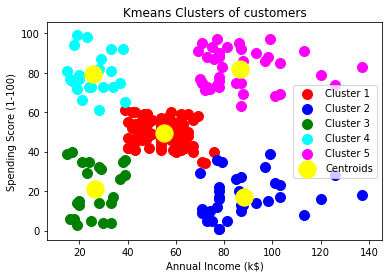

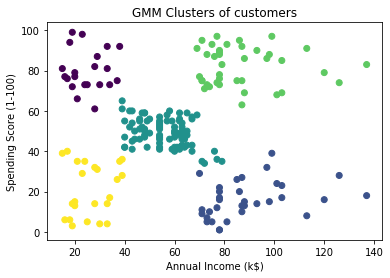

mean of kmeans model [[55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]
mean of gmm model [[25.11748524 80.12817162]
 [88.81300265 16.12462277]
 [55.710366   49.40699488]
 [86.24063303 82.02037464]
 [27.03119094 22.16675827]]
sd of kmeans model [[ 8.93245497  6.49046996]
 [16.1630973   9.80895051]
 [ 7.72029951 12.73104061]
 [ 7.39275947 10.26266603]
 [16.10199248  9.24365198]]
sd of gm [[ 7.08625944  9.92653253]
 [16.45119622  9.15642791]
 [ 9.55533003  7.04122392]
 [16.40660047  9.37723306]
 [ 8.21071694 13.57351558]]
SSE of kmeans model 44448.45544793371
SSE of gmm model 45080.64219132243


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import math

#import dataset
dataset=pd.read_csv('Mall_Customers.csv')
dataset.head()

#initialization
X = dataset.iloc[:, [3, 4]].values
random_state = 1
K=5 # number of clusters
m=X.shape[0] #number of training examples
n=X.shape[1] #number of features. Here n=2
n_iter=100
#kmeans model
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)

kmeans_sd = np.zeros((5,2))
kmeans_mean = kmeans.cluster_centers_
k = 0
freq = np.zeros((5,1))
for i in kmeans.labels_:
    freq[i] += 1
    kmeans_sd[i][0] += (X[k][0] - kmeans_mean[i][0])**2
    kmeans_sd[i][1] += (X[k][1] - kmeans_mean[i][1])**2
    k += 1
count = 0
for i in kmeans_sd:
    kmeans_sd[count][0] = math.sqrt(i[0]/freq[count])
    kmeans_sd[count][1] = math.sqrt(i[1]/freq[count])
    count += 1
kmeans_SSE =  kmeans.inertia_
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Kmeans Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#Guassian Mixture Model
gmm = GaussianMixture(n_components=5, random_state = random_state)
gmm.fit(X)
y_pred = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title('GMM Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

gmm_means = gmm.means_
gmm_sd = np.zeros((5,2))
for i in range(5):
    gmm_sd[i][0] = math.sqrt(gmm.covariances_[i][0][0])
    gmm_sd[i][1] = math.sqrt(gmm.covariances_[i][1][1])   
gmm_SSE = 0
k = 0
for i in y_pred:
    gmm_SSE += (X[k][0]-gmm_means[i][0])**2
    gmm_SSE += (X[k][1]-gmm_means[i][1])**2
    k += 1

print('mean of kmeans model', kmeans_mean)
print('mean of gmm model',gmm_means)
print('sd of kmeans model', kmeans_sd)
print('sd of gm', gmm_sd)
print('SSE of kmeans model', kmeans_SSE)
print('SSE of gmm model',gmm_SSE)

From the result we have , The kmeans method has a lower SSE which means it performs better in this model than Gaussian mixture distribution.